In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
! pip install folium

     |████████████████████████████████| 102kB 10.4MB/s ta 0:00:01


In [2]:
import folium
import requests

In [3]:
# Getting GDP Data among different countries
response=requests.get('https://www.worldometers.info/gdp/gdp-by-country/').text
soup = BeautifulSoup(response, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!-->
<html lang="en">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   GDP by Country - Worldometer
  </title>
  <meta content="Countries in the world ranked by Gross Domestic Product (GDP). List and ranking of GDP growth, GDP per capita and couuntry share of World's GDP" name="description"/>
  <link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
  <link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
  <link href="/favicon/apple-icon-60x60.png" rel="apple-touch-icon" sizes="60x60"/>
  <link href="/favicon/apple-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/>
  <link href="/favicon/apple-icon-76x76.png" rel="apple-touch-icon" sizes="76x76"/>
  <

In [5]:
print(soup.title)
print(soup.title.text)

<title>GDP by Country - Worldometer</title>
GDP by Country - Worldometer


In [6]:
gdptable=soup.find_all('table')

In [7]:
gdpdf = pd.read_html(str(gdptable))[0]
gdpdf.head(5)

,#,Country,"GDP (nominal, 2017)",GDP (abbrev.),GDP growth,Population (2017),GDP per capita,Share of World GDP
0,1,United States,"$19,485,394,000,000",$19.485 trillion,2.27%,325084756,"$59,939",24.08%
1,2,China,"$12,237,700,479,375",$12.238 trillion,6.90%,1421021791,"$8,612",15.12%
2,3,Japan,"$4,872,415,104,315",$4.872 trillion,1.71%,127502725,"$38,214",6.02%
3,4,Germany,"$3,693,204,332,230",$3.693 trillion,2.22%,82658409,"$44,680",4.56%
4,5,India,"$2,650,725,335,364",$2.651 trillion,6.68%,1338676785,"$1,980",3.28%


In [8]:
response1=requests.get('https://en.wikipedia.org/wiki/List_of_Chinese_prefecture-level_cities_by_GDP_per_capita').text
chinacities = BeautifulSoup(response1, "lxml")
print(chinacities.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of Chinese prefecture-level cities by GDP per capita - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"166ca3b2-ad4e-4f50-9904-d584ad266648","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Chinese_prefecture-level_cities_by_GDP_per_capita","wgTitle":"List of Chinese prefecture-level cities by GDP per capita","wgCurRevisionId":952447156,"wgRevisionId":952447156,"wgArticleId":8411230,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short

In [9]:
cctable=chinacities.find_all('table')

In [10]:
ccdf = pd.read_html(str(cctable))[0]
ccdf.head(5)

,GDPpcrank,cities,provinces,GDPpc(CNY),GDPpc(USD),GDP (CNY)(millions),GDP (USD)(millions)
0,NaN,Macau[1],Macau,522691,77415,341364,50559
1,NaN,Hong Kong[1],Hong Kong,311197,46091,2306948,341679
2,1.0,Shenzhen[2],Guangdong,183544,27184,2249006,333097
3,2.0,Dongying[3],Shandong,177962,26358,381435,56494
4,3.0,Ordos[4],Inner mongolia,173609,25713,357981,53020


In [11]:
# Since data of Macau and Hong Kong are not ranked and not in my consideration, I decide to drop them away
ccdf.index

RangeIndex(start=0, stop=85, step=1)

In [12]:
ccdf.drop(ccdf.index[:2], inplace=True)
ccdf.head(10)
#Showing top10 cities in China

,GDPpcrank,cities,provinces,GDPpc(CNY),GDPpc(USD),GDP (CNY)(millions),GDP (USD)(millions)
2,1.0,Shenzhen[2],Guangdong,183544,27184,2249006,333097
3,2.0,Dongying[3],Shandong,177962,26358,381435,56494
4,3.0,Ordos[4],Inner mongolia,173609,25713,357981,53020
5,4.0,Karamay[5],Xinjiang,168146,24904,74450,11027
6,5.0,Suzhou[6],Jiangsu,162388,24051,1731951,256517
7,6.0,Wuxi[6],Jiangsu,160706,23802,1051180,155689
8,7.0,Zhuhai[2],Guangdong,155502,23031,267518,39622
9,8.0,Guangzhou[2],Guangdong,150678,22317,2150315,318480
10,9.0,Nanjing[6],Jiangsu,141103,20899,1171510,173511
11,10.0,Changzhou[6],Jiangsu,140435,20800,661842,98025


In [13]:
newccdf=ccdf.groupby(['provinces']).groups.keys()

In [14]:
newccdf=pd.DataFrame(newccdf)
newccdf.rename(columns={'0':'provinces'})
newccdf.head(10)

,0
0,Anhui
1,Beijing
2,Fujian
3,Gansu
4,Guangdong
5,Guangxi
6,Guizhou
7,Hebei
8,Heilongjiang
9,Henan


In [16]:

# Getting per-capital GDP data in GuangDong Province
#Since the original dataset is in Chinese, I create a new dataframe
# original source:https://zh.wikipedia.org/wiki/%E5%B9%BF%E4%B8%9C%E5%90%84%E5%9C%B0%E7%BA%A7%E5%B8%82%E5%9C%B0%E5%8C%BA%E7%94%9F%E4%BA%A7%E6%80%BB%E5%80%BC%E5%88%97%E8%A1%A8

In [17]:
# Showing Per Capita GDP in each Prefecture-level city in Guang Dong Province
gddata=['155491','44971','189568','159428','44672','127691','63328','41107','49406','53267','85418','25367','30825','32530','52969','40476','98939','110585','40219','35358','33747']
indexname=['Guang Zhou','Shao Guan','Shen Zhen','Zhu Hai','Shan Tou','Fo Shan','Jiang Men','Zhan Jiang','Mao Ming','Zhao Qing','Hui Zhou','Mei Zhou','Shan Wei','He Yuan','Yang Jiang','Qing Yuan','Dong Guan','Zhong Shan','Chao Zhou','Jie Yang','Yun Fu']
gddf=pd.DataFrame(gddata,index=indexname,columns=['Per-Capita GDP'])
gddf

,Per-Capita GDP
Guang Zhou,155491
Shao Guan,44971
Shen Zhen,189568
Zhu Hai,159428
Shan Tou,44672
Fo Shan,127691
Jiang Men,63328
Zhan Jiang,41107
Mao Ming,49406
Zhao Qing,53267


In [18]:
gddf=gddf.sort_values(['Per-Capita GDP'],ascending=False)
gddf.tail(5)
# Choosing top 5 cities

,Per-Capita GDP
Shen Zhen,189568
Zhu Hai,159428
Guang Zhou,155491
Fo Shan,127691
Zhong Shan,110585


In [19]:
# To visualize this result, I choose to use bar chart
top5city=gddf.iloc[16:22]

In [20]:
import matplotlib as matplot
import matplotlib.pyplot as plt

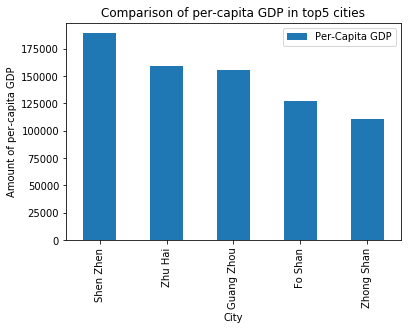

In [21]:
top5city=top5city.astype(float)
top5city.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Amount of per-capita GDP')
plt.title('Comparison of per-capita GDP in top5 cities')
plt.show()

In [22]:
import requests
import random

In [23]:
from IPython.display import Image 
from IPython.core.display import HTML 

In [24]:
from pandas.io.json import json_normalize

In [25]:
from geopy.geocoders import Nominatim

In [26]:
CLIENT_ID = 'RTACJTCMCJBZ2OHRMPIRZDKKW4MYSMCO1XCV233YCCUF2JXD'
CLIENT_SECRET = '4HZST1A0TWYN323MHHDTMNEYUX1JJVCFM5XZJIJP3OH2D4EK' 
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RTACJTCMCJBZ2OHRMPIRZDKKW4MYSMCO1XCV233YCCUF2JXD
CLIENT_SECRET:4HZST1A0TWYN323MHHDTMNEYUX1JJVCFM5XZJIJP3OH2D4EK


In [27]:
address = 'Shen Zhen, China'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

22.555454 114.0543297


In [28]:
search_query = 'Shopping'
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query,  LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=RTACJTCMCJBZ2OHRMPIRZDKKW4MYSMCO1XCV233YCCUF2JXD&client_secret=4HZST1A0TWYN323MHHDTMNEYUX1JJVCFM5XZJIJP3OH2D4EK&ll=22.555454,114.0543297&v=20180604&query=Shopping&limit=30'

In [29]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f31001251e46d2576a35013'},
 'response': {'venues': [{'id': '519df7cd498e4bab65e94859',
    'name': 'Shopping Park (购物公园)',
    'location': {'address': '深圳市福田区福华路',
     'lat': 22.53823882944563,
     'lng': 114.04871071512139,
     'labeledLatLngs': [{'label': 'display',
       'lat': 22.53823882944563,
       'lng': 114.04871071512139}],
     'distance': 2001,
     'cc': 'CN',
     'city': '深圳市',
     'state': '广东',
     'country': '中国',
     'formattedAddress': ['深圳市福田区福华路', '深圳市', '广东', '中国']},
    'categories': [{'id': '4bf58dd8d48988d1fd941735',
      'name': 'Shopping Mall',
      'pluralName': 'Shopping Malls',
      'shortName': 'Mall',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1597047414',
    'hasPerk': False},
   {'id': '4bf422a698ac0f47aba163a8',
    'name': 'Shopping Park Metro Station (购物公园地铁站)',
    'location': {'address': 'Fu

In [31]:
malls=results['response']['venues']['cc'=='CN']
malldf=json_normalize(malls)
malldf.drop(['hasPerk'],axis=1,inplace=True)

In [32]:
malldf

,categories,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",519df7cd498e4bab65e94859,深圳市福田区福华路,CN,深圳市,中国,2001,"[深圳市福田区福华路, 深圳市, 广东, 中国]","[{'label': 'display', 'lat': 22.53823882944563...",22.538239,114.048711,广东,Shopping Park (购物公园),v-1597047414


In [33]:
venue_id = '519df7cd498e4bab65e94859' 
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/519df7cd498e4bab65e94859?client_id=RTACJTCMCJBZ2OHRMPIRZDKKW4MYSMCO1XCV233YCCUF2JXD&client_secret=4HZST1A0TWYN323MHHDTMNEYUX1JJVCFM5XZJIJP3OH2D4EK&v=20180604'

In [34]:
cocoresult = requests.get(url).json()
print(cocoresult['response']['venue'].keys())
cocoresult['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'rating', 'ratingColor', 'ratingSignals', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto', 'colors'])


{'id': '519df7cd498e4bab65e94859',
 'name': 'Shopping Park (购物公园)',
 'contact': {},
 'location': {'address': '深圳市福田区福华路',
  'lat': 22.53823882944563,
  'lng': 114.04871071512139,
  'labeledLatLngs': [{'label': 'display',
    'lat': 22.53823882944563,
    'lng': 114.04871071512139}],
  'cc': 'CN',
  'city': '深圳市',
  'state': '广东',
  'country': '中国',
  'formattedAddress': ['深圳市福田区福华路', '深圳市', '广东', '中国']},
 'canonicalUrl': 'https://foursquare.com/v/%E8%B4%AD%E7%89%A9%E5%85%AC%E5%9B%AD-shopping-park/519df7cd498e4bab65e94859',
 'categories': [{'id': '4bf58dd8d48988d1fd941735',
   'name': 'Shopping Mall',
   'pluralName': 'Shopping Malls',
   'shortName': 'Mall',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/mall_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 2},
 'likes': {'count': 14,
  'groups': [{'type': 'others', 'count': 14, 'items': []}],
  'summary': '14 Likes'},
 'dislike': False,
 'ok': False,
 'rating': 7.7,
 'rati

In [35]:
cocoresult['response']['venue']['tips']['count']

2

In [37]:
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION,)
cotipresults = requests.get(url).json()
cotipresults

{'meta': {'code': 200, 'requestId': '5f31033bb0029033bd1950e8'},
 'response': {'tips': {'count': 2,
   'items': [{'id': '5544d58c498e5021a56650d2',
     'createdAt': 1430574476,
     'text': 'Nothing much here except bars, if you want to shop go coco park across the road.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/5544d58c498e5021a56650d2',
     'photo': {'id': '5544d58c498e5021a56650d1',
      'createdAt': 1430574476,
      'source': {'name': 'Instagram', 'url': 'http://instagram.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2938446_BIXLnoJwTk3kTUwxM2h9SSx1kjSM_l0GVxucGuXNuWo.jpg',
      'width': 640,
      'height': 640,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2938446_BIXLnoJwTk3kTUwxM2h9SSx1kjSM_l0GVxucGuXNuWo.jpg',
     'lang': 'en',
     'likes': {'count': 2,
      'groups': [{'type': 'others',
        'count': 2,
        'items': [{'id': '11367555',
          'fi

In [38]:
tips = cotipresults['response']['tips']['items']

tip = cotipresults['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [39]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) 

filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]


tips_filtered

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,"Nothing much here except bars, if you want to shop go coco park across the road.",2,0,5544d58c498e5021a56650d2,William,K,NaN,2938446
